# <font color='red'>Housing Price Prediction</font>

# 1. Problem Statement

The dataset contains the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

The Datset consists of 13 features & 545 samples.

The dataset was collected from kaggle website.
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset 

# 2. Data Exploration

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
df = pd.read_csv('housing.csv')

target = 'price'
features = [i for i in df.columns if i not in [target]]

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Shape of the dataset

In [4]:
df.shape

(545, 13)

The Datset consists of 13 features & 545 samples.

### Summary of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Dividing features into numerical and categorical

In [7]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = [];  #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


The Dataset has 1 numerical & 11 categorical features.


In [8]:
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

# 3. Exploratory Data Analysis (EDA)


### Analyse the distribution of the target variable

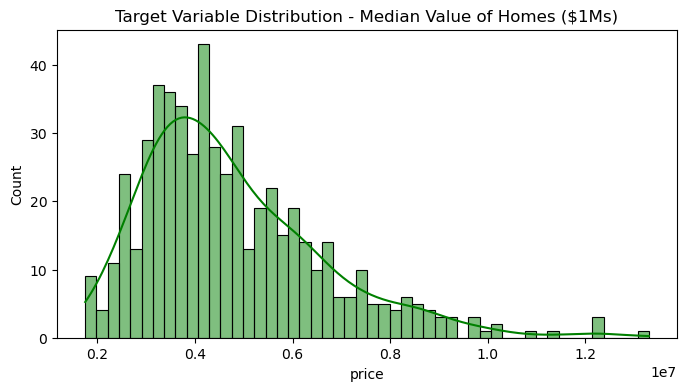

In [9]:
plt.figure(figsize=[8,4])
sns.histplot(df[target], color='g', bins=50, kde = True)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

The Target Variable seems to be be normally distributed, averaging around 20 units.

### Visualising the categorical features

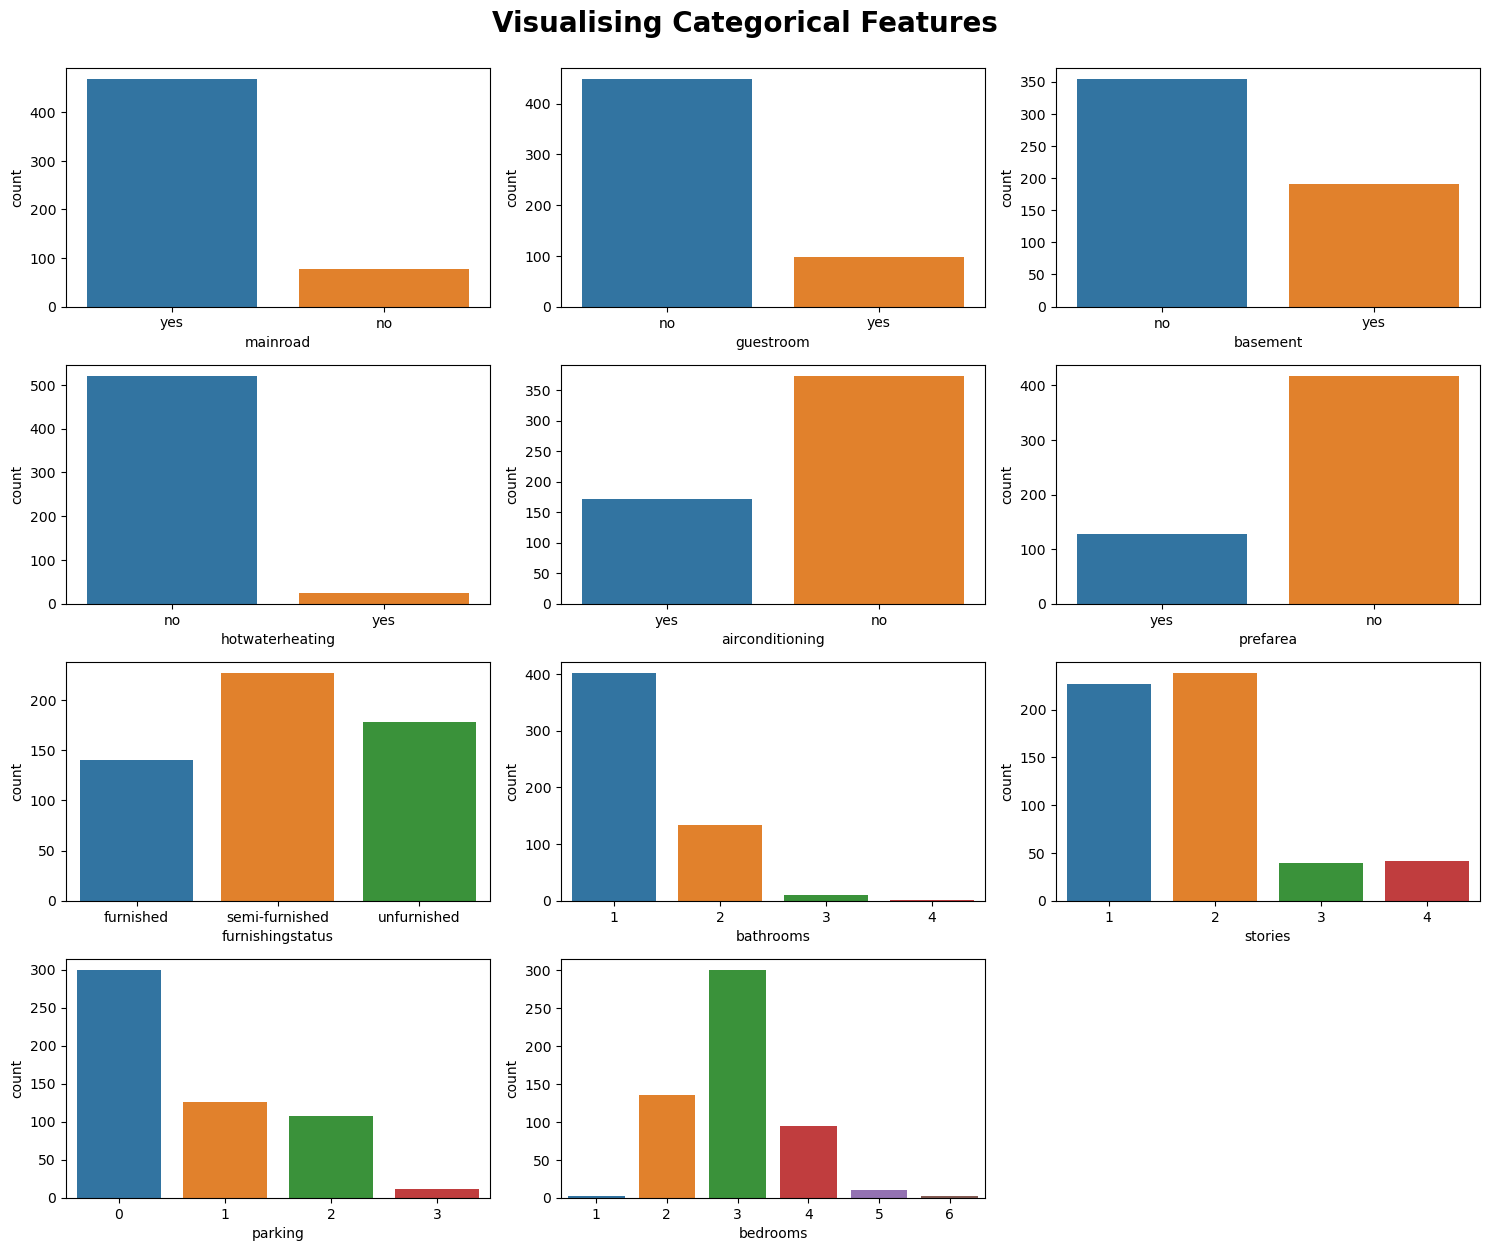

In [10]:
plt.figure(figsize=[15,15])

for i in range(len(cf)): 
    plt.suptitle("Visualising Categorical Features",fontsize=20,fontweight='bold',y=1)
    plt.subplot(5,3,i+1)
    sns.countplot(df[cf[i]]) 
        
plt.tight_layout()
plt.show()

### Visualising the numeric features 

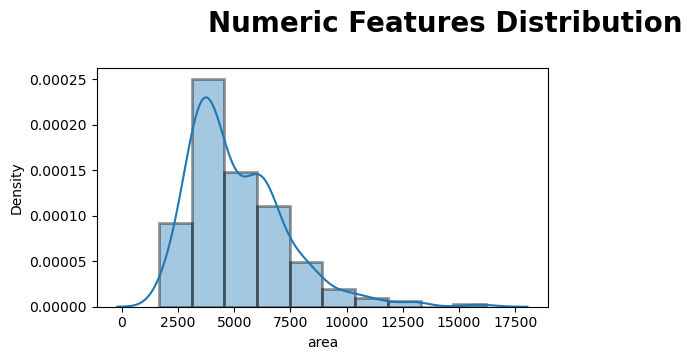

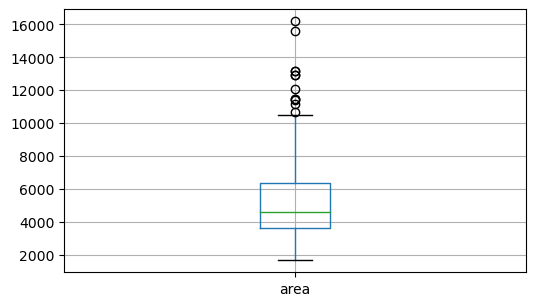

In [11]:

plt.figure(figsize=[15,15])
for i in range(len(nf)):
    plt.suptitle("Numeric Features Distribution",fontsize=20,fontweight='bold', x= 0.3,y= 1)
    plt.subplot(5,3,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, )
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,15])
for i in range(len(nf)):
    plt.subplot(5,3,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()



There seem to be some outliers in tha dataset.This need to be fixed in the upcoming section 

### Relationship between all the features

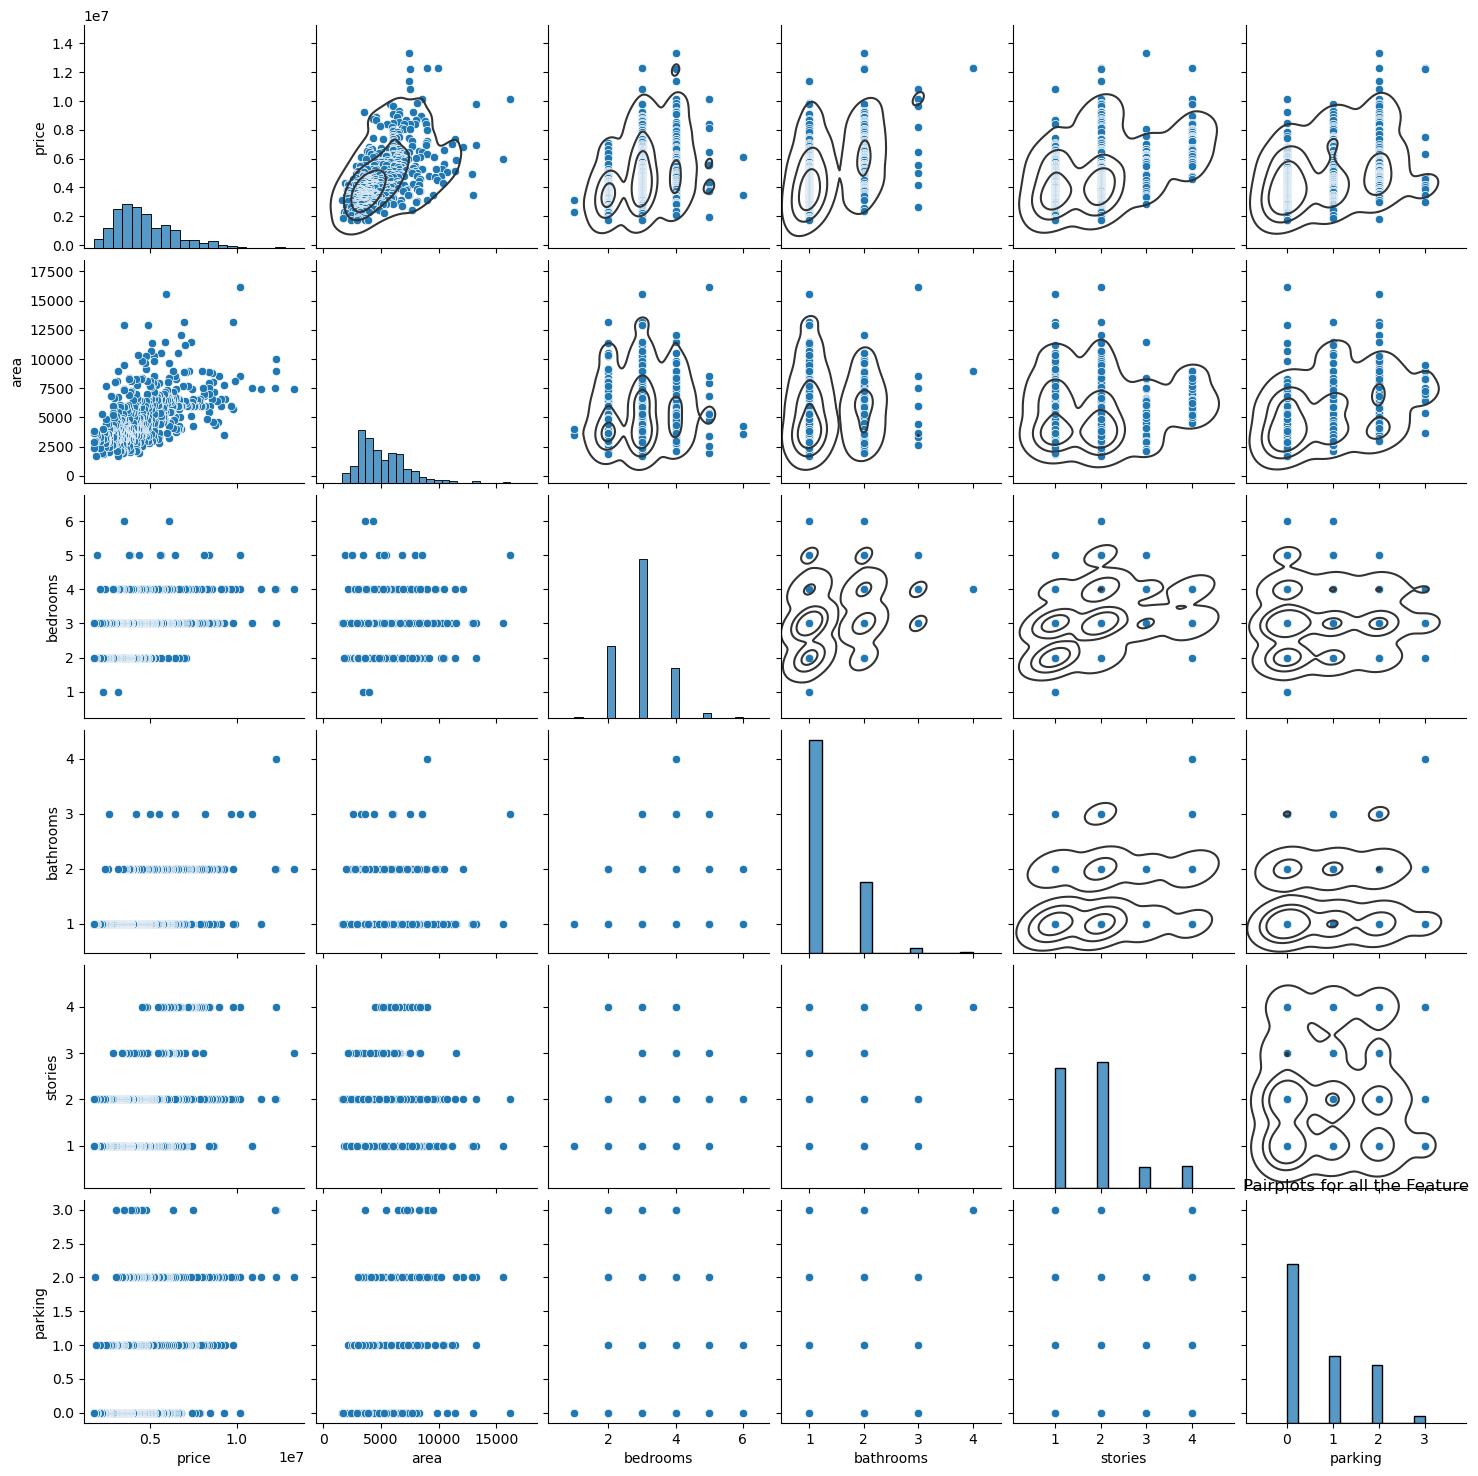

In [12]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot,levels=4, color=".2" )
plt.show()

 Some features have linear relationship between them.

# 4. Data Preprocessing

In [13]:
# remove duplicate rows if any
df.duplicated().sum()

0

The dataset doesn't have any duplicates

In [14]:
# check for empty elements
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The datset doesn't have any inconsistant values

### Converting categorical Columns to Numeric

In [15]:
new = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
new['Percentage'] = round(new['Total Null Values']/df.shape[0],3)*100

original_df = df.copy()
df3 = df.copy()

ecc = new[new['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
        
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea

Dummy Encoding on features:
furnishingstatus
bathrooms
stories
parking
bedrooms


(545, 24)

### Removal of outlier

In [16]:
df1 = df3.copy()

features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())

print('\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,13300000,7420,1,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,12250000,8960,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,12250000,9960,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,12215000,7500,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,11410000,7420,1,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0



Before removal of outliers, The dataset had 545 samples.
After removal of outliers, The dataset now has 533 samples.


### Final Dataset size after performing Preprocessing

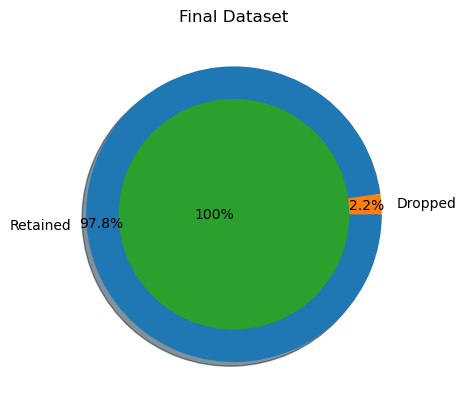

After the cleanup process, 12 samples were dropped, while retaining 2.2% of the data.


In [17]:
df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

### Checking for correlation

                                         Correlation Matrix                                         


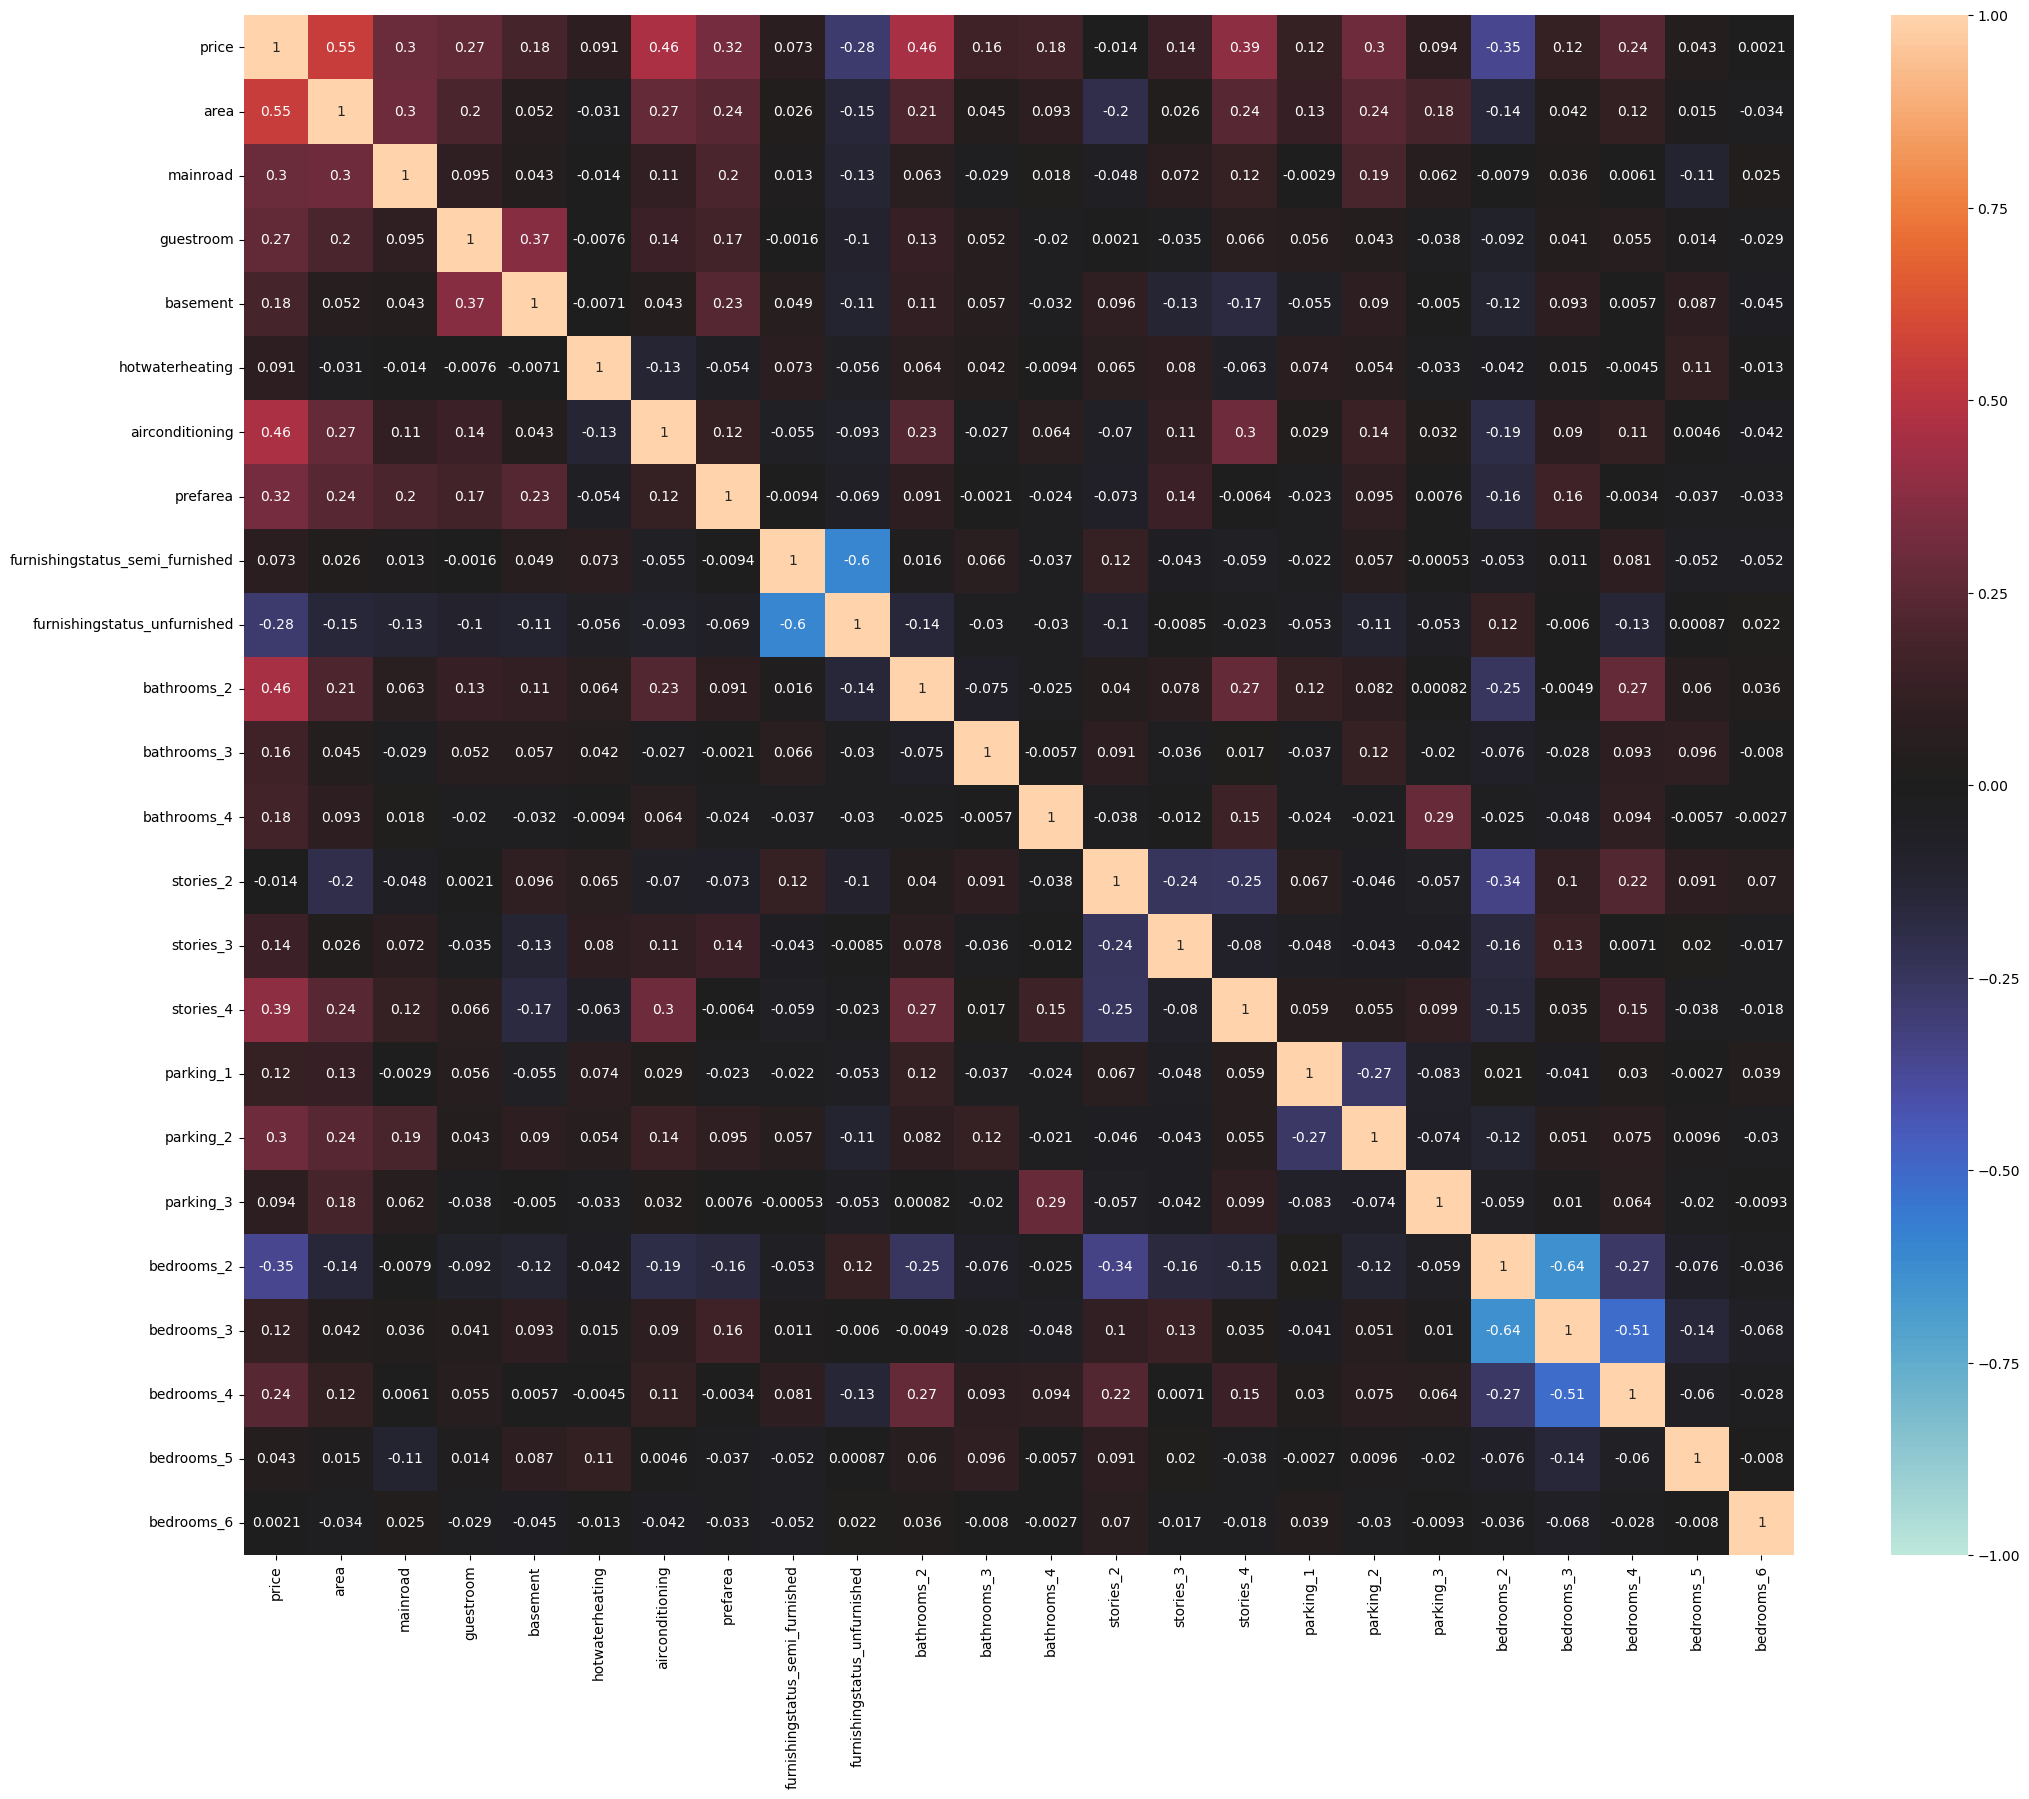

In [18]:
print('Correlation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

# 5. Data Manipulation

### Splitting the data intro training & testing sets

In [19]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
X_train.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,
      '\nTraining set  ---> ',X_train.shape,Y_train.shape,
      '\nTesting set   ---> ', X_test.shape,'', Y_test.shape)

Original set  --->  (533, 23) (533,) 
Training set  --->  (426, 23) (426,) 
Testing set   --->  (107, 23)  (107,)


### Feature Scaling (Standardization)

In [20]:
std = StandardScaler()

print('Standardardization on Training set'.center(120))
X_train_std = std.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
display(X_train_std.describe())

print('\n','Standardardization on Testing set'.center(120))
X_test_std = std.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)
display(X_test_std.describe())

                                           Standardardization on Training set                                           


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,bathrooms_2,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-8.808812e-17,-9.799152e-17,-1.334353e-16,-7.192994e-17,2.384634e-17,1.720064e-17,-1.224894e-16,-1.866009e-16,3.648620e-18,1.334353e-16,...,-8.470011e-18,-2.137049e-16,5.003822e-17,-1.824310e-18,1.015098e-16,3.440128e-17,-3.961359e-17,-4.691083e-18,1.609302e-16,4.173435e-16
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-1.797874e+00,-2.335497e+00,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.791573e-01,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,-5.972335e-01,-1.078164e+00,-4.585055e-01,-1.469106e-01,-4.850713e-02
25%,-7.487891e-01,4.281744e-01,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.791573e-01,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,-5.972335e-01,-1.078164e+00,-4.585055e-01,-1.469106e-01,-4.850713e-02
50%,-2.551019e-01,4.281744e-01,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.791573e-01,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,-5.972335e-01,9.275031e-01,-4.585055e-01,-1.469106e-01,-4.850713e-02
75%,6.110159e-01,4.281744e-01,-4.659859e-01,1.322266e+00,-2.038745e-01,1.468181e+00,-5.393599e-01,1.186077e+00,1.429286e+00,1.150196e+00,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,1.674387e+00,9.275031e-01,-4.585055e-01,-1.469106e-01,-4.850713e-02
max,2.992840e+00,4.281744e-01,2.145988e+00,1.322266e+00,4.904979e+00,1.468181e+00,1.854050e+00,1.186077e+00,1.429286e+00,1.726647e+00,...,3.699953e+00,3.633180e+00,1.829464e+00,2.032863e+00,6.806859e+00,1.674387e+00,9.275031e-01,2.180999e+00,6.806859e+00,2.061553e+01



                                            Standardardization on Testing set                                            


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,bathrooms_2,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000
mean,0.025531,0.144059,0.022233,-0.154083,0.130350,0.001839,0.042216,0.029248,0.016627,-0.040418,...,0.063671,0.126559,0.008549,-0.019996,0.048055,-0.130171,0.121488,0.010192,-1.469106e-01,0.144615
std,1.021135,0.843283,1.023054,0.947331,1.269193,1.005431,1.031339,1.009305,1.010644,0.980290,...,1.107146,1.192583,1.010164,0.988902,1.153328,0.922384,0.987957,1.013435,1.952033e-16,1.997668
min,-1.635477,-2.335497,-0.465986,-0.756278,-0.203874,-0.681115,-0.539360,-0.843115,-0.699650,-0.579157,...,-0.270274,-0.275241,-0.546608,-0.491917,-0.146911,-0.597234,-1.078164,-0.458505,-1.469106e-01,-0.048507
25%,-0.809959,0.428174,-0.465986,-0.756278,-0.203874,-0.681115,-0.539360,-0.843115,-0.699650,-0.579157,...,-0.270274,-0.275241,-0.546608,-0.491917,-0.146911,-0.597234,-1.078164,-0.458505,-1.469106e-01,-0.048507
50%,-0.200970,0.428174,-0.465986,-0.756278,-0.203874,-0.681115,-0.539360,-0.843115,-0.699650,-0.579157,...,-0.270274,-0.275241,-0.546608,-0.491917,-0.146911,-0.597234,0.927503,-0.458505,-1.469106e-01,-0.048507
75%,0.762586,0.428174,-0.465986,1.322266,-0.203874,1.468181,-0.539360,1.186077,1.429286,-0.579157,...,-0.270274,-0.275241,-0.546608,-0.491917,-0.146911,-0.597234,0.927503,-0.458505,-1.469106e-01,-0.048507
max,2.867794,0.428174,2.145988,1.322266,4.904979,1.468181,1.854050,1.186077,1.429286,1.726647,...,3.699953,3.633180,1.829464,2.032863,6.806859,1.674387,0.927503,2.180999,-1.469106e-01,20.615528


# 6.Model Building

Building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets

### Evaluation function

In [21]:
def evaluate(pred1, pred2):
    
    print('\nTraining Set Metrics')
    print('\nR2 Score on Training set --->',round(r2_score(Y_train, pred1),20))
    print('Residual sum of squares (RSS) on Training set  --->',round(np.sum(np.square(Y_train-pred1)),20))
    print('Mean absolute error (MSE) on Training set      --->',round(mean_absolute_error(Y_train, pred1),20))
    print('Mean squared error (MSE) on Training set       --->',round(mean_squared_error(Y_train, pred1),20))
    print('Root mean squared error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Y_train, pred1)),20))
    
    
    print('\nTesting Set Metrics')
    print('\nR2 Score on Testing set --->',round(r2_score(Y_test, pred2),20))
    print('Residual sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(Y_test-pred2)),20))
    print('Mean absolute error (MSE) on Testing set      --->',round(mean_absolute_error(Y_test, pred2),20))
    print('Mean squared error (MSE) on Testing set       --->',round(mean_squared_error(Y_test, pred2),20))
    print('Root mean squared error (RMSE) on Testing set --->',round(np.sqrt(mean_squared_error(Y_test, pred2)),20))

### 6a. Multiple Linear Regression(MLR)

In [22]:
MLR = LinearRegression()
MLR = MLR.fit(X_train_std,Y_train)

#prediction
pred1 = MLR.predict(X_train_std)
pred2 = MLR.predict(X_test_std)


In [23]:
evaluate(pred1, pred2)


Training Set Metrics

R2 Score on Training set ---> 0.6789097089550895
Residual sum of squares (RSS) on Training set  ---> 466429810296572.75
Mean absolute error (MSE) on Training set      ---> 763184.2805826309
Mean squared error (MSE) on Training set       ---> 1094905657973.1754
Root mean squared error (RMSE) on Training set ---> 1046377.3974877207

Testing Set Metrics

R2 Score on Testing set ---> 0.686679497638552
Residual sum of Squares (RSS) on Testing set  ---> 116042808105904.83
Mean absolute error (MSE) on Testing set      ---> 741987.3168078045
Mean squared error (MSE) on Testing set       ---> 1084512225288.8302
Root mean squared error (RMSE) on Testing set ---> 1041399.1671250896


### 6b. Polynomial  Regression(PR)

In [24]:

poly_reg = PolynomialFeatures(5)
X_poly = poly_reg.fit_transform(X_train_std)
X_poly1 = poly_reg.fit_transform(X_test_std)
PR = LinearRegression()
PR.fit(X_poly,Y_train)

#prediction
pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print("The Coeffecient of the Regresion Model was found to be ",PR.coef_)
print('\nThe Intercept of the Regresion Model was found to be ',PR.intercept_)


The Coeffecient of the Regresion Model was found to be  [ 1.10186609e+12 -2.32000992e+10  1.75628709e+09 ... -2.99593836e+06
  5.14898990e+09  5.80141937e+09]

The Intercept of the Regresion Model was found to be  -1128438009989.8457


In [25]:
evaluate(pred1, pred2)


Training Set Metrics

R2 Score on Training set ---> 0.9953435866499112
Residual sum of squares (RSS) on Training set  ---> 6764109834889.548
Mean absolute error (MSE) on Training set      ---> 20850.514434098077
Mean squared error (MSE) on Training set       ---> 15878192100.67969
Root mean squared error (RMSE) on Training set ---> 126008.69851196656

Testing Set Metrics

R2 Score on Testing set ---> -293996578911732.9
Residual sum of Squares (RSS) on Testing set  ---> 1.088859118165534e+29
Mean absolute error (MSE) on Testing set      ---> 6098725066883.757
Mean squared error (MSE) on Testing set       ---> 1.0176253440799385e+27
Root mean squared error (RMSE) on Testing set ---> 31900240501913.754


- R2 is negative only when the chosen model does not follow the trend of the data. It seems that  model may be giving better performance because of over-fitting. It can be a case of over-fitting in the model. It can happen because of various reasons like small dataset and noise in the dataset.
- R2 negative value indicates that your model’s predicted values perform worse than if you were to use the average as a predicted value.

### 6.c  Random Forest Regression(RFR)

In [26]:
RFR = RandomForestRegressor(n_estimators=100,max_depth = 10,criterion='squared_error',random_state=100)
RFR.fit(X_train_std,Y_train)

RandomForestRegressor(max_depth=10, random_state=100)

In [27]:
#prediction
pred1 =RFR.predict(X_train_std)
pred2 = RFR.predict(X_test_std)

In [28]:
evaluate(pred1, pred2)


Training Set Metrics

R2 Score on Training set ---> 0.9239624689061067
Residual sum of squares (RSS) on Training set  ---> 110455445688277.66
Mean absolute error (MSE) on Training set      ---> 363721.42780927266
Mean squared error (MSE) on Training set       ---> 259285083775.29968
Root mean squared error (RMSE) on Training set ---> 509200.4357571777

Testing Set Metrics

R2 Score on Testing set ---> 0.688652319188602
Residual sum of Squares (RSS) on Testing set  ---> 115312144932463.47
Mean absolute error (MSE) on Testing set      ---> 777026.9725191268
Mean squared error (MSE) on Testing set       ---> 1077683597499.6587
Root mean squared error (RMSE) on Testing set ---> 1038115.4066382304


# 7. Conclusion

- The Dataset was quiet small with just 545 samples & after preprocessing 2.2% of the datasamples were dropped.
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity.
- Testing multiple algorithms with default hyperparamters gave me  some understanding for various models performance on this specific dataset.
- While, **Polynomial Regression(PR)** and **Random Forest Regression(RFR)** were the overfitting, yet it is safe to use **Multiple Regression algorithm (MLR)**, as its scores were quiet comparable & also they're more generalisable.